## Example 

An example of how to use the methods from the paper "The relevance of higher-order networks"

### Importing the data from a list of hyperlinks (or links (node,hyperlink) of a bipartite network) and labels

(Data are obtained from the folder at https://www.cs.cornell.edu/~arb/data/)

In [1]:
import sys
sys.path.insert(0,'Code/')
from utilities import *

In [2]:
file_hyper = open('Data/senate-bills/hyperedges-senate-bills.txt','r')
file_labels = open('Data/senate-bills/node-labels-senate-bills.txt','r')
hyperlinks = [eval(x.replace("\n", "")) for x in file_hyper.readlines()]
labels = [int(x.replace("\n", "")) for x in file_labels.readlines()]
df_network = pd.Series(hyperlinks).reset_index()
df_network.columns = ['hyperlink_id','nodes']



In [3]:
df = get_df_hyper(hyperlinks,labels,return_labels_dict=False)

In [4]:
df.head()

,hyperlink_id,nodes,order,labels
0,0,"(1, 2, 3)",3,"(1, 1, 2)"
1,1,"(4, 5, 6)",3,"(1, 1, 1)"
2,2,"(1, 3, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17)",13,"(1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2)"
3,3,"(18, 19, 20)",3,"(1, 1, 1)"
4,4,"(4, 5, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,...",13,"(1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1)"


### Compute the order contribution and relevance for the overall sum of link weights $\Lambda$ and for the sum of inter $\Lambda_{inter,\ell}$ and intra $\Lambda_{intra,\ell}$ label link weights 

In [5]:
from link_weights import run_order_relevance_analysis

In [6]:
sr_overall = run_order_relevance_analysis(hyperlinks,labels,size_lim=50, type_analysis='overall', binned=False, unweighted=True,local_size_lim=True)

data loaded


In [7]:
sr_local = run_order_relevance_analysis(hyperlinks,labels,size_lim=50, type_analysis='labelled', binned=False, unweighted=True,local_size_lim=True)

data loaded


##### Explore the results structure

In [8]:
sr_overall.keys()

dict_keys(['order_contribution', 'order_relevance'])

In [9]:
sr_local.keys()

dict_keys(['order_contribution', 'order_relevance'])

In [10]:
sr_local['order_contribution'].keys()

dict_keys(['different_label_1', 'different_label_2', 'same_label_1', 'same_label_2'])

### Compute the group composition distribution $P(d,k)$ and group balance $\Phi_{\ell}$ for each label 

In [11]:
from joint_distribution_overlapp import run_analysis_joint_distr

1
2


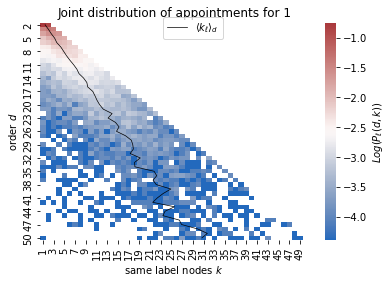

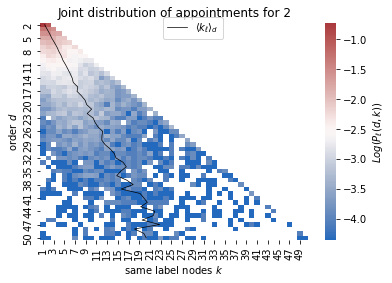

In [12]:
joint_distr = run_analysis_joint_distr(hyperlinks,labels,show_heatmap=True,save_obj = True,unweighted=True)

##### Explore the results structure

In [13]:
joint_distr.keys()

dict_keys(['group_composition_distribution', 'group_balance'])

In [14]:
joint_distr['group_composition_distribution'].keys()

dict_keys([1, 2])

### Compute the order contribution and relevance for the number of triangles $\tau$

In [15]:
from resilience_clustering_nx import run_clustering_analysis_fast


##### Order contribution $\tau^-(d)$ and relevance $\Gamma(\tau)$

In [16]:
sr1 = run_clustering_analysis_fast(hyperlinks,label_list = labels,inverse_order=True,verbose = False)

##### Complementary order contribution $\overline{\tau^-(d)}$ and relevance $\overline{\Gamma(\tau})$

In [17]:
sr1 = run_clustering_analysis_fast(hyperlinks,label_list = labels,inverse_order=False,verbose = False)

##### Explore the results structure

In [18]:
sr1

{'order_contribution': 2     0.008063
 3     0.059567
 4     0.164142
 5     0.277977
 6     0.397637
 7     0.502426
 8     0.582624
 9     0.652978
 10    0.712270
 11    0.757019
 12    0.795616
 13    0.820957
 14    0.848436
 15    0.873035
 16    0.889658
 17    0.902555
 18    0.915646
 19    0.928361
 20    0.936622
 21    0.943719
 22    0.949742
 23    0.956241
 24    0.958771
 25    0.962539
 26    0.965846
 27    0.969742
 28    0.973012
 29    0.974648
 30    0.979051
 31    0.981092
 32    0.983250
 33    0.984343
 34    0.988433
 35    0.989876
 36    0.991000
 37    0.991498
 38    0.993121
 39    0.995020
 40    0.996747
 41    0.997134
 42    0.997434
 43    0.997535
 44    0.997837
 45    0.998235
 46    0.998435
 47    0.998435
 48    0.999694
 49    0.999810
 50    1.000000
 dtype: float64,
 'order_relevance': 0.8533431841723335,
 'overall_value': 968766.0}

### Compute the order contribution and relevance for the size of the largest connected component $\sigma$ and the number of nodes of each label $\sigma_{\ell}$ belonging to it.

In [19]:
from resilience_clustering_nx import run_resilience_analysis_fast


##### Order contribution $\sigma^-(d)$, $\sigma_{\ell}^-(d)$ and relevance $\Gamma(\sigma)$, $\Gamma(\sigma_{\ell})$

In [20]:
sr = run_resilience_analysis_fast(hyperlinks,label_list = labels,inverse_order=True,save = True,verbose = False,size_lim_local=True)

50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2


In [21]:
sr1 = run_resilience_analysis_fast(hyperlinks,label_list = labels,inverse_order=False,save = True,verbose = False,size_lim_local = True)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
